## Bir Teslimat Şirketi için Tahmini Bakım Modeli - Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("failure.csv")

In [4]:
df.head(33)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438.0,0.0,0.0,7.0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174.0,0.0,0.0,0.0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394.0,0.0,0.0,0.0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186.0,0.0,0.0,0.0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173.0,0.0,0.0,3.0
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535.0,0.0,0.0,1.0
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525.0,0.0,0.0,0.0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462.0,16.0,16.0,3.0
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869.0,0.0,0.0,0.0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905.0,0.0,0.0,164.0


In [5]:
df.tail(33)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
18650,2015-01-23,S1F0G0XX,0,107824536,0,0,0,12,312371.0,0.0,0.0,0.0
18651,2015-01-23,S1F0G9ZF,0,54754160,0,0,0,70,237150.0,0.0,0.0,0.0
18652,2015-01-23,S1F0GCED,0,64600088,0,0,0,9,225083.0,0.0,0.0,0.0
18653,2015-01-23,S1F0GGJD,0,27591256,0,0,0,62,208616.0,0.0,0.0,0.0
18654,2015-01-23,S1F0GGPP,0,131691792,0,0,0,10,223579.0,0.0,0.0,0.0
18655,2015-01-23,S1F0GHJ1,0,26416096,0,0,0,58,237077.0,0.0,0.0,0.0
18656,2015-01-23,S1F0GJL9,0,7220680,0,0,0,63,239202.0,0.0,0.0,0.0
18657,2015-01-23,S1F0GJW3,0,230777168,0,0,0,9,225380.0,0.0,0.0,0.0
18658,2015-01-23,S1F0GKFX,0,107820832,0,0,0,65,240014.0,0.0,0.0,0.0
18659,2015-01-23,S1F0GKL6,0,15269440,0,0,0,90,238395.0,0.0,0.0,0.0


In [6]:
df.info() #iki objemiz var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18683 entries, 0 to 18682
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18683 non-null  object 
 1   device      18683 non-null  object 
 2   failure     18683 non-null  int64  
 3   attribute1  18683 non-null  int64  
 4   attribute2  18683 non-null  int64  
 5   attribute3  18683 non-null  int64  
 6   attribute4  18683 non-null  int64  
 7   attribute5  18683 non-null  int64  
 8   attribute6  18682 non-null  float64
 9   attribute7  18682 non-null  float64
 10  attribute8  18682 non-null  float64
 11  attribute9  18682 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum() #boşverimiz yok

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    1
attribute7    1
attribute8    1
attribute9    1
dtype: int64

In [8]:
df.corr() #attribute7 ve attribute8 aynı korelasyona sahipler

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.004822,0.100942,-0.001051,0.098043,-0.004611,-0.000520,0.175561,0.175561,-0.001608
attribute1,0.004822,1.000000,-0.015347,0.010296,-0.012060,0.001113,0.000352,-0.012482,-0.012482,0.008347
attribute2,0.100942,-0.015347,1.000000,-0.000624,0.273579,-0.003637,-0.036461,0.129278,0.129278,-0.001712
attribute3,-0.001051,0.010296,-0.000624,1.000000,0.242483,-0.013093,0.020807,-0.002106,-0.002106,0.429582
attribute4,0.098043,-0.012060,0.273579,0.242483,1.000000,-0.010783,0.021623,0.151896,0.151896,0.092674
attribute5,-0.004611,0.001113,-0.003637,-0.013093,-0.010783,1.000000,-0.023592,-0.023450,-0.023450,-0.013917
attribute6,-0.000520,0.000352,-0.036461,0.020807,0.021623,-0.023592,1.000000,0.015995,0.015995,0.031102
attribute7,0.175561,-0.012482,0.129278,-0.002106,0.151896,-0.023450,0.015995,1.000000,1.000000,-0.003256
attribute8,0.175561,-0.012482,0.129278,-0.002106,0.151896,-0.023450,0.015995,1.000000,1.000000,-0.003256
attribute9,-0.001608,0.008347,-0.001712,0.429582,0.092674,-0.013917,0.031102,-0.003256,-0.003256,1.000000


In [9]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,18683.000000,1.868300e+04,18683.000000,18683.000000,18683.000000,18683.000000,18682.000000,18682.000000,18682.000000,18682.000000
mean,0.000910,1.226084e+08,319.880105,13.299310,2.469518,13.335332,244088.594476,0.419120,0.419120,24.626914
std,0.030152,7.035794e+07,3658.819652,380.339328,30.365558,14.130015,92567.686140,6.885119,6.885119,392.775545
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.187500e+07,0.000000,0.000000,0.000000,7.000000,205905.500000,0.000000,0.000000,0.000000
50%,0.000000,1.228857e+08,0.000000,0.000000,0.000000,9.000000,237641.500000,0.000000,0.000000,0.000000
75%,0.000000,1.838344e+08,0.000000,0.000000,0.000000,12.000000,287487.500000,0.000000,0.000000,0.000000
max,1.000000,2.441386e+08,64784.000000,24929.000000,1074.000000,98.000000,664245.000000,424.000000,424.000000,18701.000000


In [10]:
df.duplicated().sum() #tekrar eden verimiz yok

0

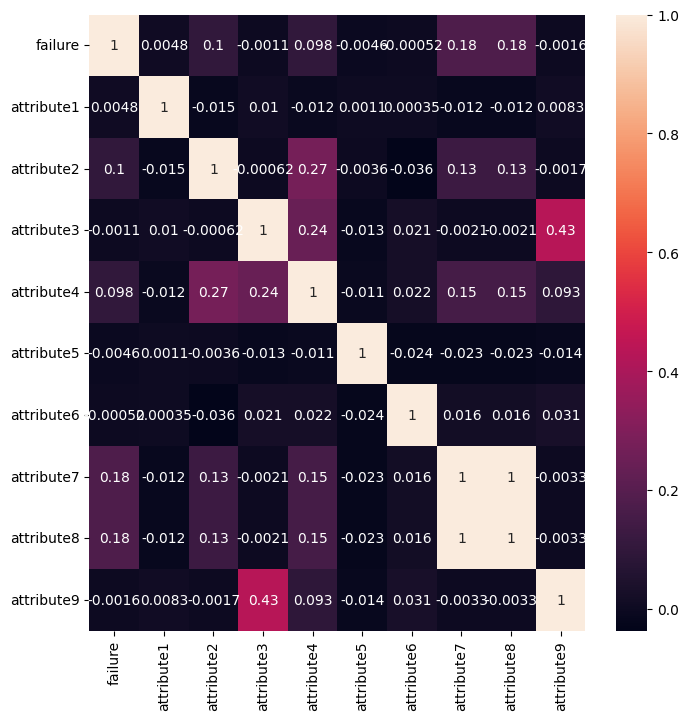

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [12]:
df.corr()["failure"].sort_values(ascending=False)

failure       1.000000
attribute7    0.175561
attribute8    0.175561
attribute2    0.100942
attribute4    0.098043
attribute1    0.004822
attribute6   -0.000520
attribute3   -0.001051
attribute9   -0.001608
attribute5   -0.004611
Name: failure, dtype: float64

In [13]:
df["device"].value_counts()

S1F0L0DW    23
S1F0FVBE    23
S1F0GKFX    23
S1F0GKL6    23
S1F0CE60    23
            ..
S1F0CVRM     5
S1F0CVY5     5
S1F0CWHW     5
S1F04KSC     4
W1F0WJFT     3
Name: device, Length: 1163, dtype: int64

In [14]:
df["failure"].value_counts()

0    18666
1       17
Name: failure, dtype: int64

In [15]:
# FEATURE ENGINEERING

In [16]:
#Date i ayıralım
df["date"]=pd.to_datetime(df["date"])

In [17]:
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year

In [18]:
#silinecekleri silelim
del df["attribute8"]
del df["date"]

In [19]:
# cihaz isimlerini kısaltmak için ilk dört önemliyi almak için
df["device"]=[i[:4] for i in df.device.values.tolist()] 

In [20]:
#kontrol
df.device.value_counts()

S1F0    5765
W1F0    4170
S1F1    2653
W1F1    2533
Z1F0    2532
Z1F1     977
Z1F2      53
Name: device, dtype: int64

In [21]:
# MODELLEME VE ALGORİTMALARI
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [33]:
def classification(x,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        rus=RandomUnderSampler(random_state=42)
        
        x_rus,y_rus=rus.fit_resample(x_train,y_train)
        
        predict=i.fit(x_rus,y_rus).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('AccuracyScore',ascending=False)

In [25]:
x=df.drop("failure", axis=1)
y=df["failure"]

In [26]:
x=pd.get_dummies(x,drop_first=True)

<img src="samplingler.jpg">

In [27]:
# UNDERSAMPLİNG
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 
gbc=GradientBoostingClassifier()

In [30]:
rus=RandomUnderSampler(random_state=42)
x_rus,y_rus=rus.fit_resample(x_train,y_train)
pred=gbc.fit(x_rus,y_rus).predict(x_test)

In [31]:
confusion_matrix(y_test,pred)

array([[2636, 1098],
       [   0,    3]])

In [34]:
classification(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Gaussian,0.986353,0.055556,1.000000,0.105263
Bernoulli,0.888948,0.007177,1.000000,0.014252
RandomForest,0.839176,0.004967,1.000000,0.009885
DecisionTree,0.762109,0.003363,1.000000,0.006704
Multinominal,0.761841,0.003359,1.000000,0.006696
AdaBoost,0.761573,0.003356,1.000000,0.006689
SVC,0.720096,0.000000,0.000000,0.000000
GradientBoosting,0.701632,0.002683,1.000000,0.005352
KNeigbors,0.480867,0.000516,0.333333,0.001030
LogisticRegr,0.000803,0.000803,1.000000,0.001604


In [39]:
# DEEPLEARNİNG
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dropout(0.50),
                           tf.keras.layers.Dense(512,activation="relu"),
                           tf.keras.layers.Dense(512,activation="softmax"),])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(x_rus,y_rus, batch_size=128, epochs=40, verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 8659225.0000 - accuracy: 0.0000e+00 - val_loss: 763.0634 - val_accuracy: 0.9992
Epoch 2/40
1/1 [==============================] - 0s 267ms/step - loss: 1425659.6250 - accuracy: 0.4286 - val_loss: 2217045.7500 - val_accuracy: 8.0278e-04
Epoch 3/40
1/1 [==============================] - 0s 252ms/step - loss: 885755.0000 - accuracy: 0.5000 - val_loss: 2749.5857 - val_accuracy: 0.9992
Epoch 4/40
1/1 [==============================] - 0s 252ms/step - loss: 2013452.2500 - accuracy: 0.5714 - val_loss: 841.7433 - val_accuracy: 0.9992
Epoch 5/40
1/1 [==============================] - 0s 249ms/step - loss: 1531801.1250 - accuracy: 0.5357 - val_loss: 2264932.0000 - val_accuracy: 8.0278e-04
Epoch 6/40
1/1 [==============================] - 0s 188ms/step - loss: 1896546.0000 - accuracy: 0.4643 - val_loss: 186.2664 - val_accuracy: 0.9992
Epoch 7/40
1/1 [==============================] - 0s 186ms/step - loss: 811662.8125 - accuracy:

In [41]:
_,accuracy=model.evaluate(x_test,y_test)
print ("Accuracy = %2f" % (accuracy*100))

117/117 [==============================] - 1s 4ms/step - loss: 51.8950 - accuracy: 0.9968
Accuracy = 99.678886
